In [50]:
import matplotlib.pyplot as plt

def plot_log(filename):
    print(filename)
    with open(filename, 'r') as f:
        lines = f.readlines()
    iterations = []
    penalties = []
    objectives = []
    
    for i in range(len(lines)):
        if 'Iteration' in lines[i]:
            iterations.append(int(lines[i].split()[2]))
            penalties.append(float(lines[i+1].split()[2]))
            objectives.append(float(lines[i+2].split()[2]))
            print('Iteration {:6d}: Penalty: {:.6f}, Objective: {:.6f}'.format(iterations[-1], penalties[-1], objectives[-1]))

    #iterations = iterations[2:]
    #penalties = penalties[2:]
    #objectives = objectives[2:]
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.set_xlabel('Iterations')
    ax1.plot(iterations, objectives, color='blue', linewidth=2)
    ax1.set_ylabel('Objective', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(alpha=0.2, axis='y', color='blue', linestyle='--')
    
    ax2 = ax1.twinx()
    ax2.plot(iterations, penalties, color='red', linewidth=2)
    ax2.set_ylabel('Penalty', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.grid(alpha=0.2, axis='y', color='red', linestyle='--')
    
    plt.title(filename)
    plt.show()

../gradient/multicore_nio/3.log
Iteration      0: Penalty: 543.639414, Objective: 9.357911
Iteration    100: Penalty: 18.393480, Objective: 44.836611
Iteration    200: Penalty: 3.560898, Objective: 45.912237
Iteration    300: Penalty: 1.787073, Objective: 43.823154
Iteration    400: Penalty: 1.333848, Objective: 42.341039
Iteration    500: Penalty: 1.106667, Objective: 41.262699
Iteration    600: Penalty: 0.905838, Objective: 40.430946
Iteration    700: Penalty: 0.734747, Objective: 39.772064
Iteration    800: Penalty: 0.588086, Objective: 39.245192
Iteration    900: Penalty: 0.460977, Objective: 38.812962
Iteration   1000: Penalty: 0.349369, Objective: 38.454234
Iteration   1100: Penalty: 0.250306, Objective: 38.159341
Iteration   1200: Penalty: 0.161714, Objective: 37.912048
Iteration   1300: Penalty: 0.082252, Objective: 37.701749
Iteration   1400: Penalty: 0.010600, Objective: 37.523300
Iteration   1500: Penalty: 0.000000, Objective: 37.373809
Iteration   1600: Penalty: 0.000000, O

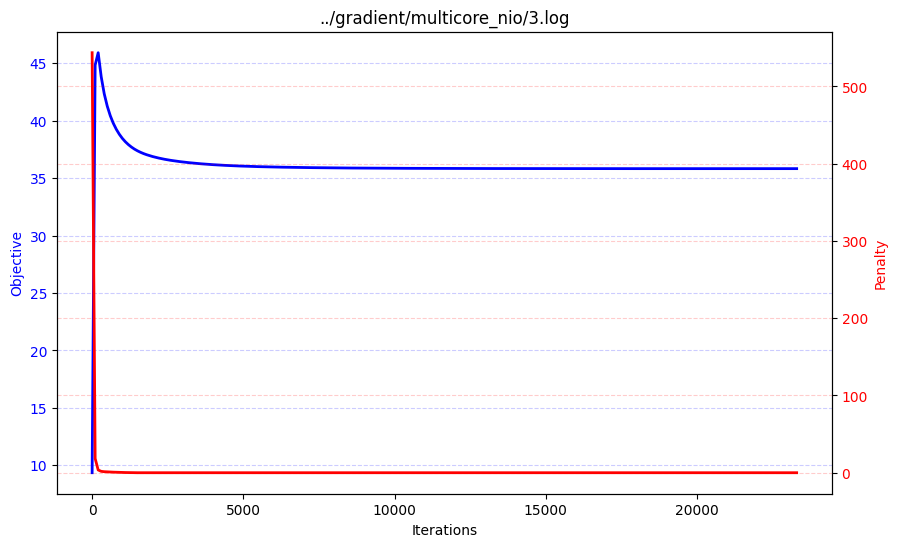

../gradient/multicore_nio/4.log
Iteration      0: Penalty: 487.759597, Objective: 4.061688
Iteration    100: Penalty: 72.012036, Objective: 41.489490
Iteration    200: Penalty: 19.853459, Objective: 42.442030
Iteration    300: Penalty: 8.940826, Objective: 39.674371
Iteration    400: Penalty: 2.413297, Objective: 37.772365
Iteration    500: Penalty: 0.000000, Objective: 36.526478
Iteration    600: Penalty: 0.000000, Objective: 35.702376
Iteration    700: Penalty: 0.000000, Objective: 35.127107
Iteration    800: Penalty: 0.000000, Objective: 34.707237
Iteration    900: Penalty: 0.000000, Objective: 34.388328
Iteration   1000: Penalty: 0.000000, Objective: 34.138561
Iteration   1100: Penalty: 0.000000, Objective: 33.935406
Iteration   1200: Penalty: 0.000000, Objective: 33.768154
Iteration   1300: Penalty: 0.000000, Objective: 33.625980
Iteration   1400: Penalty: 0.000000, Objective: 33.503478
Iteration   1500: Penalty: 0.000000, Objective: 33.395963
Iteration   1600: Penalty: 0.000000, 

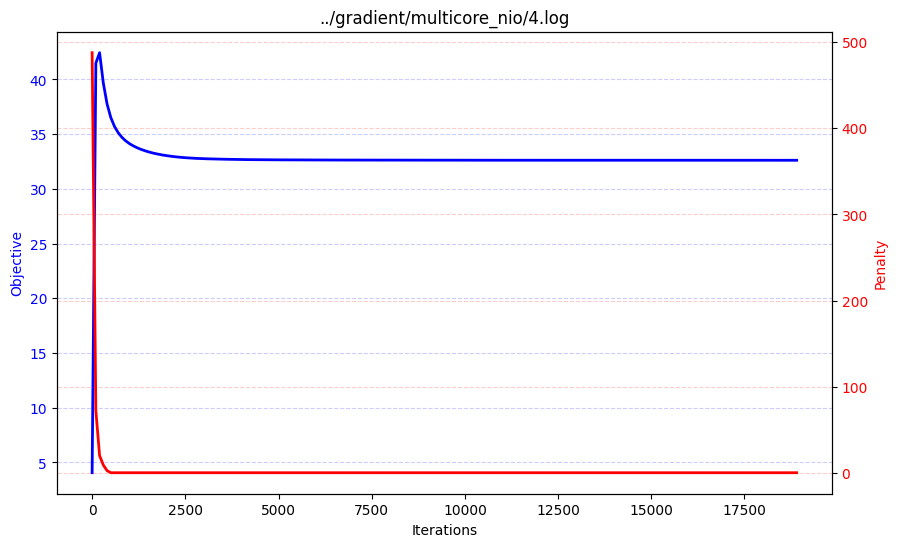

../gradient/multicore_nio/5.log
Iteration      0: Penalty: 767.524283, Objective: 5.053594
Iteration    100: Penalty: 129.397877, Objective: 46.299819
Iteration    200: Penalty: 2.157894, Objective: 35.350927
Iteration    300: Penalty: 0.000000, Objective: 33.201200
Iteration    400: Penalty: 0.000000, Objective: 32.068436
Iteration    500: Penalty: 0.000000, Objective: 31.377116
Iteration    600: Penalty: 0.000000, Objective: 30.927742
Iteration    700: Penalty: 0.000000, Objective: 30.607322
Iteration    800: Penalty: 0.000000, Objective: 30.356258
Iteration    900: Penalty: 0.000000, Objective: 30.150065
Iteration   1000: Penalty: 0.000000, Objective: 29.977629
Iteration   1100: Penalty: 0.000000, Objective: 29.830858
Iteration   1200: Penalty: 0.000000, Objective: 29.703609
Iteration   1300: Penalty: 0.000000, Objective: 29.596512
Iteration   1400: Penalty: 0.000000, Objective: 29.507555
Iteration   1500: Penalty: 0.000000, Objective: 29.429897
Iteration   1600: Penalty: 0.000000, 

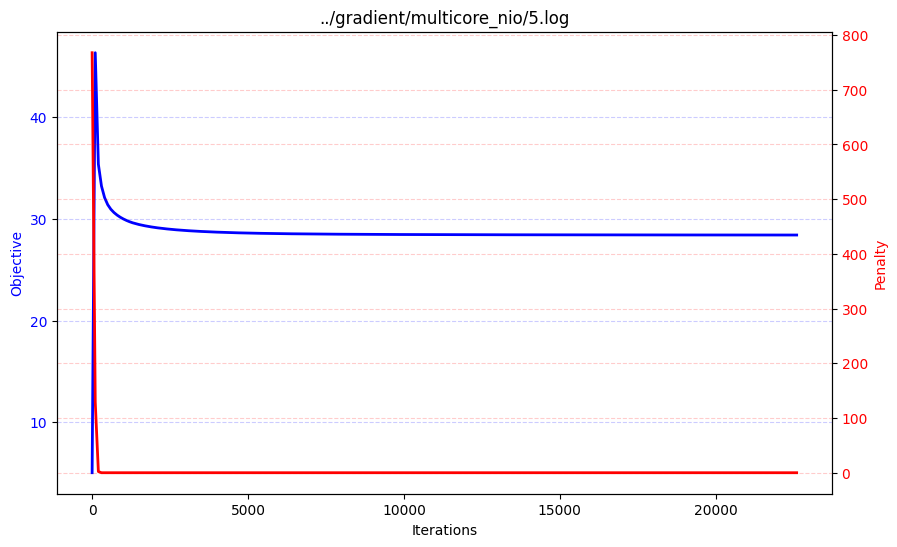

In [51]:
plot_log('../gradient/multicore_nio/3.log')
plot_log('../gradient/multicore_nio/4.log')
plot_log('../gradient/multicore_nio/5.log')